In [1]:
# リスト 5-3-(1)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# データのロード -----
data = np.load("ch5_data.npz")
X = data["X"]
X_min = 0
X_max = data["X_max"]
N = data["N"]
T = data["T"]

print(F"X = {X}\nX_max = {X_max}\nN = {N}\nT = {T}")

X = [15.42555012 23.00811234  5.00285937 12.55831432  8.66889727  7.30846487
  9.65650528 13.63901818 14.91918686 18.47041835 15.47986286 22.13048751
 10.11130624 26.95293591  5.68468983 21.76168775]
X_max = 30
N = 16
T = [170.91013145 160.67559882 129.00206616 159.70139552 155.46058905
 140.56134369 153.65466385 159.42939554 164.70423898 169.64527574
 160.71257522 173.28709855 159.31193249 171.51757345 138.9570433
 165.8744074 ]


In [2]:
# リスト 5-3-(2)
# ガウス関数 -----
def gauss(x, mu, s):
    y = np.exp(-((x - mu) **2) / (2 * s ** 2)) # 式 5-64
    return y

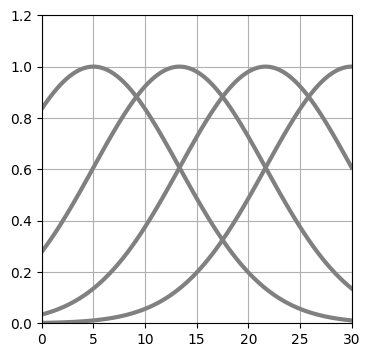

[ 5.         13.33333333 21.66666667 30.        ] 8.333333333333334


In [3]:
# リスト 5-3-(3)
# メイン -----
M = 4                                 # ガウス関数の数
mu = np.linspace(5, 30, M)            # 平均パラメータ
s = mu[1] - mu[0]                     # 標準偏差パラメータ
xb = np.linspace(X_min, X_max, 100)
y = np.zeros((M, 100))                # M 個のガウス関数の値を入れる y を準備
for j in range(M):
    y[j, :] = gauss(xb, mu[j], s)     # ガウス関数

# グラフ描画 -----
plt.figure(figsize=(4, 4))
for j in range(M):
    plt.plot(xb, y[j, :], "gray", linewidth=3)

plt.xlim(X_min, X_max)
plt.ylim(0, 1.2)
plt.grid()
plt.show()
print(mu, s)

In [4]:
# リスト 5-3-(4)
# 線形既定関数モデル -----
def gauss_func(w, x):
    m = len(w) - 1       # ガウス関数の数
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    # x と同じサイズで要素が 0 の ndarray 型を作成
    y = np.zeros_like(x)
    # ここでは式 5-66 ではなく式 5-65 で実装
    for j in range(m):
        y = y + w[j] * gauss(x, mu[j], s)

    y = y + w[m]         # Φ を掛けないパラメータを最後に加える
    return y

In [5]:
# リスト 5-3-(5)
# 線形基底関数モデルの平均二乗誤差（MSE）-----
def mse_gauss_func(x, t, w):
    y = gauss_func(w, x)
    mes = np.mean((y - t) ** 2)
    return mes

In [6]:
# リスト 5-3-(6)
# 線形基底関数モデルの厳密解 -----
def fit_gauss_func(x, t, m):
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    n = x.shape[0]
    # 式 5-69 の計画行列 phi を作成
    phi = np.ones((n, m + 1))     # 要素が 1 の n × (m + 1) 行列
    for j in range(m):            # 0 ～ m - 1 列に値を割り振る
        phi[:, j] = gauss(x, mu[j], s)

    # 式 5-68 で厳密解の w を計算
    w = np.linalg.inv(phi.T @ phi) @ phi.T @ t
    return w

w =  [29.39 75.66  2.86 98.28 54.88]
SD = 3.98 cm


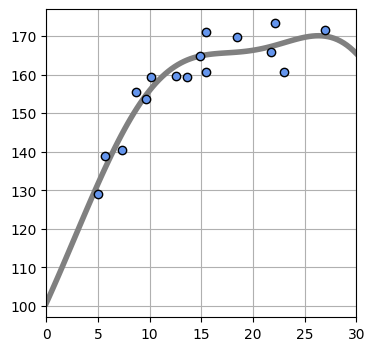

In [7]:
# リスト 5-3-(7)
# ガウス基底関数表示 -----
def show_gauss_func(w):
    x = np.linspace(X_min, X_max, 100)
    y = gauss_func(w, x)
    plt.plot(x, y, "gray", linewidth=4)

# メイン -----
M = 4                         # ガウス関数の数
w = fit_gauss_func(X, T, M)   # w を計算
mse = mse_gauss_func(X, T, w) # MSE を計算
# 結果表示
print("w = ", np.round(w, 2))
print(f"SD = {np.sqrt(mse):.2f} cm")

# グラフ描画 -----
plt.figure(figsize=(4, 4))
show_gauss_func(w)
plt.plot(
    X, T, "cornflowerblue", 
    marker="o", linestyle="None", markeredgecolor="black",
)
plt.xlim(X_min, X_max)
plt.grid()
plt.show()

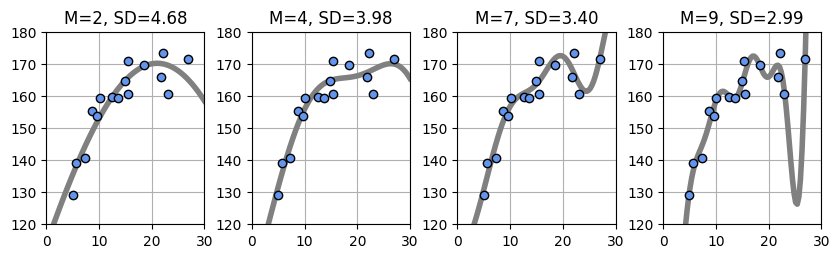

In [8]:
# リスト 5-3-(8)
M = [2, 4, 7, 9]     # 調べる M の値
plt.figure(figsize=(10, 2.5))
plt.subplots_adjust(wspace=0.3)
for i in range(len(M)):
    plt.subplot(1, len(M), i + 1)
    w = fit_gauss_func(X, T, M[i])  # w を計算
    mse = mse_gauss_func(X, T, w)   # MSE を計算
    # グラフ描画
    show_gauss_func(w)    # 線形基底関数
    plt.plot(             # データ点
        X, T, "cornflowerblue",
        marker="o", linestyle="None", markeredgecolor="black",
    )
    plt.title(f"M={M[i]:d}, SD={np.sqrt(mse):.2f}")
    plt.xlim(X_min, X_max)
    plt.ylim(120, 180)
    plt.grid()

plt.show()

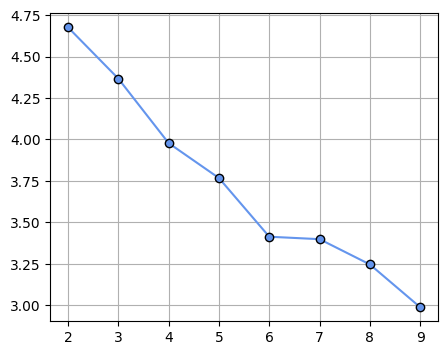

In [9]:
# リスト 5-3-(9)
# メイン -----
M = range(2, 10)
sd = np.zeros(len(M))
for i in range(len(M)):
    w = fit_gauss_func(X, T, M[i])           # w を計算
    sd[i] = np.sqrt(mse_gauss_func(X, T, w)) # SD を計算

# グラフ描画
plt.figure(figsize=(5, 4))
plt.plot(M, sd, "cornflowerblue", marker="o", markeredgecolor="black")
plt.grid()
plt.show()

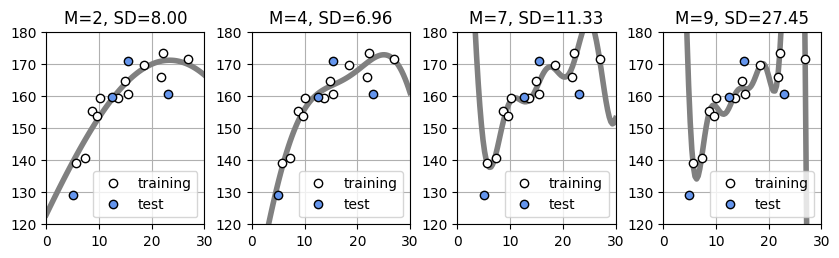

In [10]:
# リスト 5-3-(10)
# 訓練データとテストデータに分割 -----
split = int(N / 4)  # 分割するインデックス
X_test = X[:split]
T_test = T[:split]
X_train = X[split:]
T_train = T[split:]

# メイン -----
M = [2, 4, 7, 9]    # 調べる M の値
plt.figure(figsize=(10, 2.5))
plt.subplots_adjust(wspace=0.3)
for i in range(len(M)):
    w = fit_gauss_func(X_train, T_train, M[i])      # w を計算
    sd = np.sqrt(mse_gauss_func(X_test, T_test, w)) # SD を計算
    # グラフ描画
    plt.subplot(1, len(M), i + 1)
    show_gauss_func(w)    # 線形基底関数
    plt.plot(             # 訓練データ
        X_train, T_train, "white",
        marker="o", linestyle="None", markeredgecolor="black",
        label="training",
    )
    plt.plot(             # テストデータ
        X_test, T_test, "cornflowerblue",
        marker="o", linestyle="None", markeredgecolor="black",
        label="test",
    )
    plt.title(f"M={M[i]:d}, SD={sd:.2f}")
    plt.legend(loc="lower right", fontsize=10, numpoints=1)
    plt.xlim(X_min, X_max)
    plt.ylim(120, 180)
    plt.grid()

plt.show()

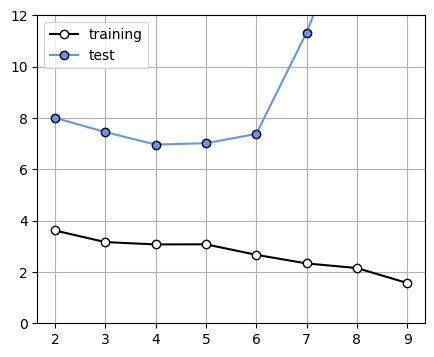

In [12]:
# リスト 5-3-(11)
# メイン -----
M = range(2, 10)   # 調べる M の値、2 から 9
sd_train = np.zeros(len(M))
sd_test = np.zeros(len(M))
for i in range(len(M)):
    # w を計算
    w = fit_gauss_func(X_train, T_train, M[i])
    # 訓練データの SD を計算
    sd_train[i] = np.sqrt(mse_gauss_func(X_train, T_train, w))
    # テストデータの SD を計算
    sd_test[i] = np.sqrt(mse_gauss_func(X_test, T_test, w))

# グラフ描画 -----
plt.figure(figsize=(5, 4))
plt.plot(     # 訓練データの SD
    M, sd_train, "black",
    marker="o", linestyle="-",
    markerfacecolor="white", markeredgecolor="black",
    label="training",
)
plt.plot(     # テストデータの SD
    M, sd_test, "cornflowerblue",
    marker="o", linestyle="-",
    markeredgecolor="black",
    label="test",
)
plt.legend(loc="upper left", fontsize=10)
plt.ylim(0, 12)
plt.grid()
plt.show()

In [15]:
# リスト 5-3-(12)
# K 分割交差検証 -----
def kfold_gauss_func(x, t, m, k):
    n = x.shape[0]
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    for i in range(0, k):
        # 訓練データとテストデータに分割
        # テストデータのインデックス
        i_test = np.fmod(range(n), k)
        x_test = x[i_test == i]       # テストデータ x
        t_test = t[i_test == i]       # テストデータ t
        x_train = x[i_test != i]      # 訓練データ x
        t_train = t[i_test != i]      # 訓練データ t
        # w を訓練データで決める
        w = fit_gauss_func(x_train, t_train, m)
        # 訓練データの MSE を計算
        mse_train[i] = mse_gauss_func(x_train, t_train, w)
        # テストデータの MSE を計算
        mse_test[i] = mse_gauss_func(x_test, t_test, w)

    return mse_train, mse_test

In [16]:
# リスト 5-3-(13)
np.fmod(range(10), 5)

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4], dtype=int32)

In [17]:
# リスト 5-3-(14)
M = 4
K = 4
kfold_gauss_func(X, T, M, K)

(array([12.87927851,  9.81768697, 17.2615696 , 12.92270498]),
 array([ 39.65348229, 734.70782018,  18.30921743,  47.52459642]))

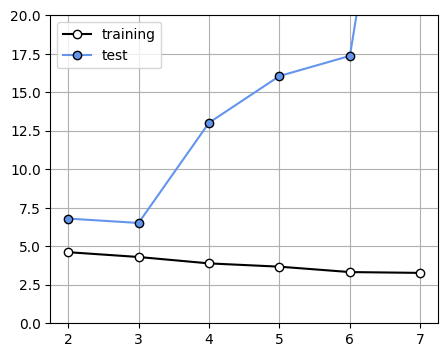

In [19]:
# リスト 5-3-(15)
# メイン -----
M = range(2, 8)
K = 16
Cv_Gauss_train = np.zeros((K, len(M)))
Cv_Gauss_test = np.zeros((K, len(M)))
for i in range(0, len(M)):
    Cv_Gauss_train[:, i], Cv_Gauss_test[:, i] = kfold_gauss_func(X, T, M[i], K)   # K 分割交差検定

# 訓練データの各分割における MSE の平均、の平方根
sd_Gauss_train = np.sqrt(np.mean(Cv_Gauss_train, axis=0))
# テストデータの各分割における MSE の平均、の平方根
sd_Gauss_test = np.sqrt(np.mean(Cv_Gauss_test, axis=0))
np.save("ch5_Gauss_test.npy", sd_Gauss_test)                 # 結果の保存

# グラフ描画 -----
plt.figure(figsize=(5, 4))
# 訓練データに対する MSE のグラフ
plt.plot(
    M, sd_Gauss_train, "black",
    marker="o", linestyle="-",
    markerfacecolor="white", markeredgecolor="black",
    label="training",
)
# テストデータに対する MSE のグラフ
plt.plot(
    M, sd_Gauss_test, "cornflowerblue",
    marker="o", linestyle="-",
    markeredgecolor="black",
    label="test",
)
plt.legend(loc="upper left", fontsize=10)
plt.ylim(0, 20)
plt.grid()
plt.show()

SD = 4.37 cm


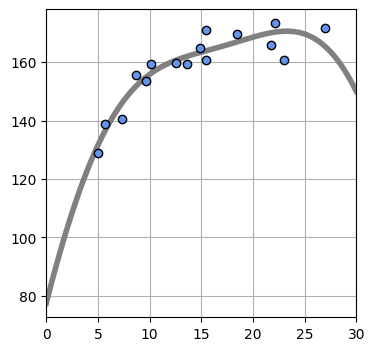

In [20]:
# リスト 5-3-(16)
# メイン -----
M = 3    # 最適な M = 3 に設定
w = fit_gauss_func(X, T, M)             # 全データで w を計算
sd = np.sqrt(mse_gauss_func(X, T, w))   # SD を計算
# 結果表示
print(f"SD = {sd:.2f} cm")

# グラフ描画 -----
plt.figure(figsize=(4, 4))
show_gauss_func(w)
plt.plot(
    X, T, "cornflowerblue",
    marker="o", linestyle="None", markeredgecolor="black",
)
plt.xlim(X_min, X_max)
plt.grid()
plt.show()